<a href="https://colab.research.google.com/github/HW0327/Electromagnetism-Project/blob/main/difference_cases_of_wire_parallel_to_plane_RFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import math
import numpy as np
import pandas as pd
import random
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import warnings
#suppress warnings
warnings.filterwarnings('ignore')
# Set up the constants
mu_0 = 4 * math.pi * 1e-7  # Permeability of free space

# Set up the parameters for the data
I_values = np.linspace(10,50,5)  # Values of I to use


In [ ]:
x=np.linspace(-40,40,5)    # x-position of the testing point
y=np.linspace(-40,40,5)    # y-position of the testing point
H=np.linspace(10,50,5)     # Height of the wire

# coeffcients of the line given by the equation ax+by+c=0
a=[-4,-3,-2,2,3,4]   
b=[-4,-3,-2,2,3,4]   
c=[-4,-3,-2,2,3,4]   


In [ ]:

# Create the header row for the CSV file
header_row = ['I', 'H', 'X', 'Y', 'a', 'b', 'c', 'B']

# Create a list to store the rows of data
data_rows = []

# Loop over the I and R values and calculate the corresponding B values
for I in I_values:
  for n in H:
    for m in x:
      for j in y:
        for q in a:
          for w in b:
            for e in c:
              R=np.abs(q*m+w*j+e)/np.sqrt(q**2+w**2)
              B = mu_0 * I / (2 * math.pi * np.sqrt(R**2+n**2))
              data_rows.append([I, n, m, j, q, w, e, B])

# Write the data to a CSV file
with open('biot_savart_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(header_row)
    writer.writerows(data_rows)

data=pd.read_csv('biot_savart_data.csv', sep=',')
#data=preprocessing.normalize(data)
data=(data-data.mean())/data.std()
data

,I,H,X,Y,a,b,c,B
0,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,-1.286530,-1.009141
1,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,-0.964898,-1.009892
2,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,-0.643265,-1.010638
3,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,0.643265,-1.013579
4,-1.414208,-1.414208,-1.414208,-1.414208,-1.28653,-1.28653,0.964898,-1.014303
...,...,...,...,...,...,...,...,...
134995,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,-0.964898,-0.326841
134996,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,-0.643265,-0.328469
134997,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,0.643265,-0.334947
134998,1.414208,1.414208,1.414208,1.414208,1.28653,1.28653,0.964898,-0.336557


In [ ]:
I_noise = np.random.normal(np.mean(np.array(data['I'])),1,40)
X_noise = np.random.normal(np.mean(np.array(data['X'])),1,40)
H_noise = np.random.normal(np.mean(np.array(data['H'])),1,40)
Y_noise = np.random.normal(np.mean(np.array(data['Y'])),1,40)
a_noise = np.random.normal(np.mean(np.array(data['a'])),1,40)
b_noise = np.random.normal(np.mean(np.array(data['b'])),1,40)
c_noise = np.random.normal(np.mean(np.array(data['c'])),1,40)
B_noise = np.random.normal(np.mean(np.array(data['B'])),1,40)
noise=pd.DataFrame({'I': I_noise, 'H': H_noise, 'X': X_noise, 'Y': Y_noise, 'a':a_noise, 'b':b_noise, 'c':c_noise, 'B': B_noise})
data=data.append(noise, ignore_index=True)
data=np.array(data)
print(len(data))

135040


In [ ]:

# Split the data into training and testing sets
num_training_samples = 10000
#training_data = data[:num_training_samples]
#testing_data = data[num_training_samples:]
X=[[row[0], row[1], row[2], row[3], row[4], row[5], row[6]] for row in data]
y=[row[7] for row in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
# Create the regression models
linear_regression = LinearRegression()
decision_tree_regression = DecisionTreeRegressor(max_depth=5)
neural_network_regression = MLPRegressor(hidden_layer_sizes=(10, 10))
decision_tree_regression2 = DecisionTreeRegressor(max_depth=10)
knn = KNeighborsRegressor()
RFC=RandomForestRegressor()
# Fit the regression models iteratively
train_sizes = range(100, num_training_samples, 100)
losses = []
model_losses = []
n=0
for train_size in train_sizes:
  X_trainn = np.array(X_train[:train_size])
  y_trainn = np.array(y_train[:train_size])
  RFC.fit(X_trainn, y_trainn)
  y_pred = RFC.predict(X_test)
  loss = mean_squared_error(y_test, y_pred)
  losses.append(loss)
  print(f'{n}',loss)
  n+=1



0 0.605461731018631
1 0.46767816551558844
2 0.42512191600449356
3 0.40853580525460087
4 0.4018640765676669
5 0.3935695061030176
6 0.37645980925954003
7 0.372791903467868
8 0.3657466580901697
9 0.361833176131401
10 0.3663484419587434
11 0.3582691293208129
12 0.3583790880130489
13 0.3534523180138101
14 0.3624644390967136
15 0.3572546511011826
16 0.3572207500287296
17 0.35824045271461097
18 0.35736325844769173
19 0.35949539080028525
20 0.35359678269085665
21 0.35639270804992196
22 0.34419996467385067
23 0.34735387675107743
24 0.34206917113399476
25 0.3432579183896775
26 0.33998243380609416
27 0.3383929639161029
28 0.34050826198213824
29 0.3367985963962936
30 0.33615534242323913
31 0.33510695932629525
32 0.3281746718429304
33 0.32791961622681126
34 0.32277783352106754
35 0.32402531084394576
36 0.31956643653222255
37 0.3102395014280118
38 0.3082891095061083
39 0.31370403549261244
40 0.31306881048848434
41 0.30841425943155987
42 0.31071467854258905
43 0.3040591302120392
44 0.307070301621629


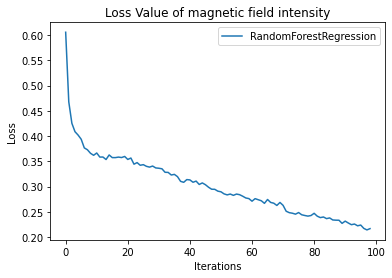

In [ ]:
# Plot model losses
plt.plot(losses, label='RandomForestRegression')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Value of magnetic field intensity")
plt.legend(loc="upper right")

plt.show()


In [ ]:
# Predict on testing data using trained models, and calculate the test  mean square error of each model


pred=RFC.predict(X_test)
regression_mse = mean_squared_error(y_test, pred)
print("mean square error:", regression_mse)
acc=0
for i in range(len(pred)):
  if abs(pred[i]==y_test[i])<=0.1:
    acc+=1
print("accuracy:", acc/len(pred))


mean square error: 0.21659988650338746
accuracy: 1.0


In [ ]:
I_losses = []
X=[[row[1], row[2], row[3], row[4], row[5], row[6], row[7]] for row in data]
y=[row[0] for row in data]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
n=0
for train_size in train_sizes:
  X_trainn = np.array(X_train[:train_size])
  y_trainn = np.array(y_train[:train_size])
  RFC.fit(X_trainn, y_trainn)
  y_pred = RFC.predict(X_test)
  loss = mean_squared_error(y_test, y_pred)
  I_losses.append(loss)
  print(f'{n}',loss)
  n+=1

0 0.2708287554900002
1 0.2392184966636239
2 0.22390239804156803
3 0.20244528544591828
4 0.1952728366143298
5 0.1946466586584128
6 0.1879784690615194
7 0.18570516795161152
8 0.18327439110309124
9 0.17859749594740548
10 0.1761710127491801
11 0.1734963777711826
12 0.1683242359958069
13 0.1684982401810593
14 0.16593580137142777
15 0.1619783795620941
16 0.16112903603310538
17 0.15496157282539258
18 0.15572742171529716
19 0.1521686329120462
20 0.14955963120783822
21 0.1490205053129202
22 0.1504195011720963
23 0.14655369893856562
24 0.14261345191108388
25 0.14189563436434566
26 0.141326348743582
27 0.13932681971718727
28 0.1389884965368639
29 0.1386397232039487
30 0.13580804838228033
31 0.13391688940776705
32 0.13256122492493821
33 0.13371158059250807
34 0.1311825430950329
35 0.13014331170807397
36 0.1297008499825067
37 0.13251065412233579
38 0.1308744658312105
39 0.1301351475976529
40 0.12887636505690195
41 0.1280141604229624
42 0.12752497629906545
43 0.1278464888690462
44 0.1276906463548656

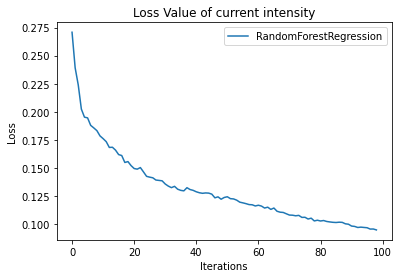

In [ ]:
# Plot model losses

plt.plot(I_losses, label='RandomForestRegression')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Value of current intensity")
plt.legend(loc="upper right")

plt.show()

In [ ]:
# Predict on testing data using trained models, and calculate the test mean square error of each model

pred=RFC.predict(X_test)
regression_mse = mean_squared_error(y_test, pred)
print("mean square error:", regression_mse)
acc=0
for i in range(len(pred)):
  if abs(pred[i]-y_test[i])<=0.1:
    acc+=1
print("accuracy:", acc/len(pred))



mean square error: 0.09494392306752318
accuracy: 0.603228672985782
